In [1]:
import pandas as pd
import matplotlib.pyplot as plt
file_path = r'C:\Users\Avilipsa\Downloads\Price_Hist.xlsx'
# Read the Excel file (default to the first sheet)
df = pd.read_excel(file_path, sheet_name='Sheet2')
# Display the first few rows of the dataframe
print(df.head())
print(df.columns)
df['PriceDt'] = pd.to_datetime(df['PriceDt'])
df.set_index('PriceDt', inplace=True)
# Calculate moving average
df['10-day-MA'] = df['CurrPrc'].rolling(window=10).mean()
print(df)

     PriceDt  AstId    CurrPrc  OpenPrc  close    high     low      volume
0 2024-07-08   4733  40.590168    40.93  40.62  41.040  40.290  1017535810
1 2024-07-07   4733  40.410000    40.93  40.41  40.955  40.290    23488968
2 2024-07-05   4733  40.538473    41.02  40.90  41.200  40.290   525814912
3 2024-07-03   4733  40.924038    41.02  40.93  41.200  39.960   737422299
4 2024-07-02   4733  40.416730    40.00  40.93  40.960  39.675  1399402887
Index(['PriceDt', 'AstId', 'CurrPrc', 'OpenPrc', 'close', 'high', 'low',
       'volume'],
      dtype='object')
            AstId    CurrPrc  OpenPrc  close    high     low      volume  \
PriceDt                                                                    
2024-07-08   4733  40.590168    40.93  40.62  41.040  40.290  1017535810   
2024-07-07   4733  40.410000    40.93  40.41  40.955  40.290    23488968   
2024-07-05   4733  40.538473    41.02  40.90  41.200  40.290   525814912   
2024-07-03   4733  40.924038    41.02  40.93  41.200  39.

In [2]:
df['50-day-MA']=df['CurrPrc'].rolling(window=50).mean()
print(df)

            AstId    CurrPrc  OpenPrc  close    high     low      volume  \
PriceDt                                                                    
2024-07-08   4733  40.590168    40.93  40.62  41.040  40.290  1017535810   
2024-07-07   4733  40.410000    40.93  40.41  40.955  40.290    23488968   
2024-07-05   4733  40.538473    41.02  40.90  41.200  40.290   525814912   
2024-07-03   4733  40.924038    41.02  40.93  41.200  39.960   737422299   
2024-07-02   4733  40.416730    40.00  40.93  40.960  39.675  1399402887   
...           ...        ...      ...    ...     ...     ...         ...   
2019-03-28   4733  27.190241    27.20  27.33  27.410  26.945   432204280   
2019-03-27   4733  27.107465    27.15  27.21  27.370  26.880  1045429484   
2019-03-26   4733  27.100558    27.15  27.21  27.380  26.610  1891761629   
2018-08-24   4733  30.895000    30.94   0.00  31.080  30.850    25713239   
2018-07-25   4733  30.830000    30.85  30.83  31.110  30.650           2   

           

In [3]:
df_filled = df.fillna(method='ffill')
print(df_filled)

            AstId    CurrPrc  OpenPrc  close    high     low      volume  \
PriceDt                                                                    
2024-07-08   4733  40.590168    40.93  40.62  41.040  40.290  1017535810   
2024-07-07   4733  40.410000    40.93  40.41  40.955  40.290    23488968   
2024-07-05   4733  40.538473    41.02  40.90  41.200  40.290   525814912   
2024-07-03   4733  40.924038    41.02  40.93  41.200  39.960   737422299   
2024-07-02   4733  40.416730    40.00  40.93  40.960  39.675  1399402887   
...           ...        ...      ...    ...     ...     ...         ...   
2019-03-28   4733  27.190241    27.20  27.33  27.410  26.945   432204280   
2019-03-27   4733  27.107465    27.15  27.21  27.370  26.880  1045429484   
2019-03-26   4733  27.100558    27.15  27.21  27.380  26.610  1891761629   
2018-08-24   4733  30.895000    30.94   0.00  31.080  30.850    25713239   
2018-07-25   4733  30.830000    30.85  30.83  31.110  30.650           2   

           

In [4]:
import numpy as np
# Generate a complete date range
date_range = pd.date_range(start=df.index.min(), end=df.index.max())
# Reindex the dataframe to include the full date range
df = df.reindex(date_range, fill_value=np.nan)
df.index.name = 'PriceDt'
print(df)

             AstId    CurrPrc  OpenPrc  close    high    low        volume  \
PriceDt                                                                      
2018-07-25  4733.0  30.830000    30.85  30.83  31.110  30.65  2.000000e+00   
2018-07-26     NaN        NaN      NaN    NaN     NaN    NaN           NaN   
2018-07-27     NaN        NaN      NaN    NaN     NaN    NaN           NaN   
2018-07-28     NaN        NaN      NaN    NaN     NaN    NaN           NaN   
2018-07-29     NaN        NaN      NaN    NaN     NaN    NaN           NaN   
...            ...        ...      ...    ...     ...    ...           ...   
2024-07-04     NaN        NaN      NaN    NaN     NaN    NaN           NaN   
2024-07-05  4733.0  40.538473    41.02  40.90  41.200  40.29  5.258149e+08   
2024-07-06     NaN        NaN      NaN    NaN     NaN    NaN           NaN   
2024-07-07  4733.0  40.410000    40.93  40.41  40.955  40.29  2.348897e+07   
2024-07-08  4733.0  40.590168    40.93  40.62  41.040  40.29  1.

In [5]:
#df_filled = df.interpolate(method='linear')
df_filled = df.fillna(method='ffill')
print(df_filled)

             AstId    CurrPrc  OpenPrc  close    high    low        volume  \
PriceDt                                                                      
2018-07-25  4733.0  30.830000    30.85  30.83  31.110  30.65  2.000000e+00   
2018-07-26  4733.0  30.830000    30.85  30.83  31.110  30.65  2.000000e+00   
2018-07-27  4733.0  30.830000    30.85  30.83  31.110  30.65  2.000000e+00   
2018-07-28  4733.0  30.830000    30.85  30.83  31.110  30.65  2.000000e+00   
2018-07-29  4733.0  30.830000    30.85  30.83  31.110  30.65  2.000000e+00   
...            ...        ...      ...    ...     ...    ...           ...   
2024-07-04  4733.0  40.924038    41.02  40.93  41.200  39.96  7.374223e+08   
2024-07-05  4733.0  40.538473    41.02  40.90  41.200  40.29  5.258149e+08   
2024-07-06  4733.0  40.538473    41.02  40.90  41.200  40.29  5.258149e+08   
2024-07-07  4733.0  40.410000    40.93  40.41  40.955  40.29  2.348897e+07   
2024-07-08  4733.0  40.590168    40.93  40.62  41.040  40.29  1.

In [6]:
pip install pandas_ta

Note: you may need to restart the kernel to use updated packages.


In [7]:
import pandas_ta as ta
# Calculate RSI (Relative Strength Index)
df_filled['RSI'] = ta.rsi(df_filled['close'], length=14)

# Calculate MACD (Moving Average Convergence Divergence)
macd = ta.macd(df_filled['close'], fast=12, slow=26, signal=9)
df_filled['MACD'] = macd['MACD_12_26_9']
df_filled['MACD_Signal'] = macd['MACDs_12_26_9']
df_filled['MACD_Hist'] = macd['MACDh_12_26_9']

# Calculate Bollinger Bands
bollinger = ta.bbands(df_filled['close'], length=10, std=2)
df_filled['Bollinger_Upper'] = bollinger['BBU_10_2.0']
df_filled['Bollinger_Middle'] = bollinger['BBM_10_2.0']
df_filled['Bollinger_Lower'] = bollinger['BBL_10_2.0']

print(df_filled)

             AstId    CurrPrc  OpenPrc  close    high    low        volume  \
PriceDt                                                                      
2018-07-25  4733.0  30.830000    30.85  30.83  31.110  30.65  2.000000e+00   
2018-07-26  4733.0  30.830000    30.85  30.83  31.110  30.65  2.000000e+00   
2018-07-27  4733.0  30.830000    30.85  30.83  31.110  30.65  2.000000e+00   
2018-07-28  4733.0  30.830000    30.85  30.83  31.110  30.65  2.000000e+00   
2018-07-29  4733.0  30.830000    30.85  30.83  31.110  30.65  2.000000e+00   
...            ...        ...      ...    ...     ...    ...           ...   
2024-07-04  4733.0  40.924038    41.02  40.93  41.200  39.96  7.374223e+08   
2024-07-05  4733.0  40.538473    41.02  40.90  41.200  40.29  5.258149e+08   
2024-07-06  4733.0  40.538473    41.02  40.90  41.200  40.29  5.258149e+08   
2024-07-07  4733.0  40.410000    40.93  40.41  40.955  40.29  2.348897e+07   
2024-07-08  4733.0  40.590168    40.93  40.62  41.040  40.29  1.

In [8]:
# Function to calculate Bollinger Bands
def calculate_bollinger_bands(df, window=20, num_std=2):
    df['Bollinger_Middle'] = df['close'].rolling(window=window).mean()
    df['Bollinger_Std'] = df['close'].rolling(window=window).std()
    df['Bollinger_Upper'] = df['Bollinger_Middle'] + (df['Bollinger_Std'] * num_std)
    df['Bollinger_Lower'] = df['Bollinger_Middle'] - (df['Bollinger_Std'] * num_std)
    df.drop(columns=['Bollinger_Std'], inplace=True)
    return df
# Function to calculate MACD
def calculate_macd(df, short_window=12, long_window=26, signal_window=9):
    df['EMA12'] = df['close'].ewm(span=short_window, adjust=False).mean()
    df['EMA26'] = df['close'].ewm(span=long_window, adjust=False).mean()
    df['MACD_Line'] = df['EMA12'] - df['EMA26']
    df['MACD_Signal'] = df['MACD_Line'].ewm(span=signal_window, adjust=False).mean()
    df['MACD_Hist'] = df['MACD_Line'] - df['MACD_Signal']
    df.drop(columns=['EMA12', 'EMA26'], inplace=True)
    return df
# Function to calculate RSI
def calculate_rsi(df, window=14):
    delta = df['close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    df['RSI'] = 100 - (100 / (1 + rs))
    return df

df_filled = calculate_bollinger_bands(df_filled)
df_filled['Bollinger_Upper'].fillna(method='ffill', inplace=True)
df_filled['Bollinger_Middle'].fillna(method='ffill', inplace=True)
df_filled['Bollinger_Lower'].fillna(method='ffill', inplace=True)

# Impute MACD
df_filled = calculate_macd(df_filled)
df_filled['MACD_Line'].fillna(method='ffill', inplace=True)
df_filled['MACD_Signal'].fillna(method='ffill', inplace=True)
df_filled['MACD_Hist'].fillna(method='ffill', inplace=True)

# Impute RSI
df_filled = calculate_rsi(df_filled)
df_filled['RSI'].fillna(method='ffill', inplace=True)

print(df_filled)

             AstId    CurrPrc  OpenPrc  close    high    low        volume  \
PriceDt                                                                      
2018-07-25  4733.0  30.830000    30.85  30.83  31.110  30.65  2.000000e+00   
2018-07-26  4733.0  30.830000    30.85  30.83  31.110  30.65  2.000000e+00   
2018-07-27  4733.0  30.830000    30.85  30.83  31.110  30.65  2.000000e+00   
2018-07-28  4733.0  30.830000    30.85  30.83  31.110  30.65  2.000000e+00   
2018-07-29  4733.0  30.830000    30.85  30.83  31.110  30.65  2.000000e+00   
...            ...        ...      ...    ...     ...    ...           ...   
2024-07-04  4733.0  40.924038    41.02  40.93  41.200  39.96  7.374223e+08   
2024-07-05  4733.0  40.538473    41.02  40.90  41.200  40.29  5.258149e+08   
2024-07-06  4733.0  40.538473    41.02  40.90  41.200  40.29  5.258149e+08   
2024-07-07  4733.0  40.410000    40.93  40.41  40.955  40.29  2.348897e+07   
2024-07-08  4733.0  40.590168    40.93  40.62  41.040  40.29  1.

In [9]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
# Assuming your DataFrame is named df_filled and indexed by PriceDt (date)
# df_filled = your_dataframe
df_filled.sort_index(inplace=True)
# Calculate the index for splitting
split_idx = int(len(df_filled) * 0.8)
# Split the DataFrame
train_df = df_filled.iloc[:split_idx]
test_df = df_filled.iloc[split_idx:]
# Display the result
print("Training Set:")
print(train_df)
print("\nTesting Set:")
print(test_df)

Training Set:
             AstId    CurrPrc  OpenPrc  close    high     low       volume  \
PriceDt                                                                      
2018-07-25  4733.0  30.830000    30.85  30.83  31.110  30.650          2.0   
2018-07-26  4733.0  30.830000    30.85  30.83  31.110  30.650          2.0   
2018-07-27  4733.0  30.830000    30.85  30.83  31.110  30.650          2.0   
2018-07-28  4733.0  30.830000    30.85  30.83  31.110  30.650          2.0   
2018-07-29  4733.0  30.830000    30.85  30.83  31.110  30.650          2.0   
...            ...        ...      ...    ...     ...     ...          ...   
2023-04-25  4733.0  29.080461    29.79  29.76  29.900  28.815  989586607.0   
2023-04-26  4733.0  28.660450    29.45  28.84  29.533  28.300  926054540.0   
2023-04-27  4733.0  28.841471    28.76  28.89  29.080  28.300  904585571.0   
2023-04-28  4733.0  29.144829    28.53  28.89  29.430  28.510  540124168.0   
2023-04-29  4733.0  29.144829    28.53  28.89  29.

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
# Assuming your DataFrame is named df_filled 
df_filled.sort_index(inplace=True)
# Calculate the index for splitting
split_idx = int(len(df_filled) * 0.8)
# Split the DataFrame into training and testing sets
train_df = df_filled.iloc[:split_idx]
test_df = df_filled.iloc[split_idx:]
# Separate the features and the target column 'Close'
X_train = train_df.drop(columns=['close'])
y_train = train_df['close']
X_test = test_df.drop(columns=['close'])
y_test = test_df['close']

print("Training Set Features:")
print(X_train)
print("\nTraining Set Target:")
print(y_train)
print("\nTesting Set Features:")
print(X_test)
print("\nTesting Set Target:")
print(y_test)

Training Set Features:
             AstId    CurrPrc  OpenPrc    high     low       volume  \
PriceDt                                                               
2018-07-25  4733.0  30.830000    30.85  31.110  30.650          2.0   
2018-07-26  4733.0  30.830000    30.85  31.110  30.650          2.0   
2018-07-27  4733.0  30.830000    30.85  31.110  30.650          2.0   
2018-07-28  4733.0  30.830000    30.85  31.110  30.650          2.0   
2018-07-29  4733.0  30.830000    30.85  31.110  30.650          2.0   
...            ...        ...      ...     ...     ...          ...   
2023-04-25  4733.0  29.080461    29.79  29.900  28.815  989586607.0   
2023-04-26  4733.0  28.660450    29.45  29.533  28.300  926054540.0   
2023-04-27  4733.0  28.841471    28.76  29.080  28.300  904585571.0   
2023-04-28  4733.0  29.144829    28.53  29.430  28.510  540124168.0   
2023-04-29  4733.0  29.144829    28.53  29.430  28.510  540124168.0   

            10-day-MA  50-day-MA        RSI      MACD

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
# Impute missing values in the training and test sets
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)
print('Training features')
print(X_train_imputed)
print('Testing features')
print(X_test_imputed)

Training features
[[4.73300000e+03 3.08300000e+01 3.08500000e+01 ... 2.85266008e+01
  2.17301872e+01 0.00000000e+00]
 [4.73300000e+03 3.08300000e+01 3.08500000e+01 ... 2.85266008e+01
  2.17301872e+01 0.00000000e+00]
 [4.73300000e+03 3.08300000e+01 3.08500000e+01 ... 2.85266008e+01
  2.17301872e+01 0.00000000e+00]
 ...
 [4.73300000e+03 2.88414707e+01 2.87600000e+01 ... 2.91945000e+01
  2.73781593e+01 1.39093005e-01]
 [4.73300000e+03 2.91448286e+01 2.85300000e+01 ... 2.92470000e+01
  2.75379763e+01 8.63397523e-02]
 [4.73300000e+03 2.91448286e+01 2.85300000e+01 ... 2.92995000e+01
  2.77122949e+01 4.40249275e-02]]
Testing features
[[ 4.73300000e+03  2.91448286e+01  2.85300000e+01 ...  2.93470000e+01
   2.78786949e+01  1.03705783e-02]
 [ 4.73300000e+03  2.92350917e+01  2.95000000e+01 ...  2.93755000e+01
   2.79374388e+01  1.49961386e-02]
 [ 4.73300000e+03  2.81192698e+01  2.95000000e+01 ...  2.93920000e+01
   2.79787306e+01 -6.96042160e-04]
 ...
 [ 4.73300000e+03  4.05384726e+01  4.10200000

In [13]:
# Train a simple linear regression model
model = LinearRegression()
model.fit(X_train_imputed, y_train)
# Make predictions on the test set
y_pred = model.predict(X_test_imputed)
# Calculate error metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
# Display the results
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Mean Absolute Error (MAE): 0.64
Mean Squared Error (MSE): 0.64
Root Mean Squared Error (RMSE): 0.80
R-squared (R2): 0.97


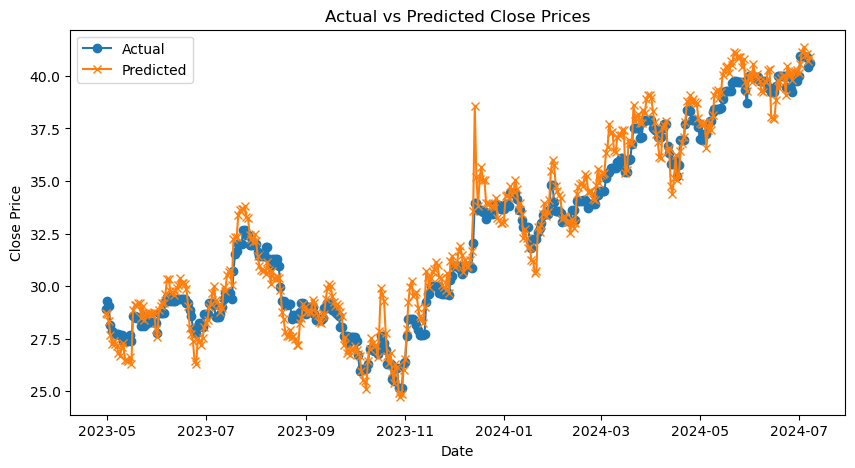

In [14]:
# Optionally, plot the predictions vs actual values
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(test_df.index, y_test, label='Actual', marker='o')
plt.plot(test_df.index, y_pred, label='Predicted', marker='x')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Actual vs Predicted Close Prices')
plt.legend()
plt.show()

In [24]:
pip install LinearRegression

Note: you may need to restart the kernel to use updated packages.


In [31]:
# Define the feature columns and target column
feature_cols = ['AstId','CurrPrc','OpenPrc', 'high', 'low', 'volume', 'Bollinger_Upper', 'Bollinger_Middle', 'Bollinger_Lower', 
                'MACD_Line', 'MACD_Signal', 'MACD_Hist','MACD', 'RSI','10-day-MA','50-day-MA']
target_col = 'close'
# Check for NaN values and fill them
df_filled[feature_cols] = df_filled[feature_cols].fillna(method='ffill').fillna(method='bfill')
X = df_filled[feature_cols]
y = df_filled[target_col]
# Check the shape and columns of X
print(f"Feature columns: {X.columns}")
print(f"Number of features: {X.shape[1]}")
# Predict the next day's closing price
next_day_features = X.iloc[-1].values.reshape(1, -1)
next_day_prediction = model.predict(next_day_features)
print(f"Predicted next day's closing price: {next_day_prediction[0]}")

Feature columns: Index(['AstId', 'CurrPrc', 'OpenPrc', 'high', 'low', 'volume',
       'Bollinger_Upper', 'Bollinger_Middle', 'Bollinger_Lower', 'MACD_Line',
       'MACD_Signal', 'MACD_Hist', 'MACD', 'RSI', '10-day-MA', '50-day-MA'],
      dtype='object')
Number of features: 16
Predicted next day's closing price: 8694.62416541559
